# Prepare a classification model using SVM for salary data 
Data Description:

    age -- age of a person
    workclass	-- A work class is a grouping of work 
    education	-- Education of an individuals	
    maritalstatus -- Marital status of an individulas	
    occupation	 -- occupation of an individuals
    relationship -- 	
    race --  Race of an Individual
    sex --  Gender of an Individual
    capitalgain --  profit received from the sale of an investment	
    capitalloss	-- A decrease in the value of a capital asset
    hoursperweek -- number of hours work per week	
    native -- Native of an individual
    Salary -- salary of an individual


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from collections import Counter
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, \
f1_score, classification_report,ConfusionMatrixDisplay, get_scorer_names, roc_curve, roc_auc_score
from sklearn.model_selection import KFold , GridSearchCV, train_test_split, StratifiedKFold, RandomizedSearchCV
from tqdm.notebook import tqdm

In [3]:
salary_train_data = pd.read_csv('SalaryData_Train(1).csv')
salary_train_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
salary_test_data = pd.read_csv('SalaryData_Test(1).csv')
salary_test_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [5]:
salary_train_data.drop(['educationno','capitalgain','capitalloss'], axis = 1, inplace = True)
salary_test_data.drop(['educationno','capitalgain','capitalloss'], axis = 1, inplace = True)

# Exploratory Data Analysis

#### Info

In [6]:
salary_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   maritalstatus  30161 non-null  object
 4   occupation     30161 non-null  object
 5   relationship   30161 non-null  object
 6   race           30161 non-null  object
 7   sex            30161 non-null  object
 8   hoursperweek   30161 non-null  int64 
 9   native         30161 non-null  object
 10  Salary         30161 non-null  object
dtypes: int64(2), object(9)
memory usage: 2.5+ MB


In [7]:
salary_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   maritalstatus  15060 non-null  object
 4   occupation     15060 non-null  object
 5   relationship   15060 non-null  object
 6   race           15060 non-null  object
 7   sex            15060 non-null  object
 8   hoursperweek   15060 non-null  int64 
 9   native         15060 non-null  object
 10  Salary         15060 non-null  object
dtypes: int64(2), object(9)
memory usage: 1.3+ MB


#### Descriptive Statistics

In [31]:
salary_train_data.describe(include='all')

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,hoursperweek,native,Salary
count,30161.000000,30161,30161,30161,30161,30161,30161,30161,30161.000000,30161,30161
unique,NaN,7,16,7,14,6,5,2,NaN,40,2
top,NaN,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,United-States,<=50K
freq,NaN,22285,9840,14065,4038,12463,25932,20380,NaN,27504,22653
mean,38.438115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.931269,NaN,NaN
std,13.134830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.980182,NaN,NaN
min,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,28.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.000000,NaN,NaN
50%,37.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.000000,NaN,NaN
75%,47.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,NaN


In [32]:
salary_test_data.describe(include='all')

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,hoursperweek,native,Salary
count,15060.000000,15060,15060,15060,15060,15060,15060,15060,15060.000000,15060,15060
unique,NaN,7,16,7,14,6,5,2,NaN,40,2
top,NaN,Private,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,NaN,United-States,<=50K
freq,NaN,11021,4943,6990,1992,6203,12970,10147,NaN,13788,11360
mean,38.768327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.951594,NaN,NaN
std,13.380676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.062831,NaN,NaN
min,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,28.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.000000,NaN,NaN
50%,37.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,NaN


#### Missing Values

In [33]:
salary_train_data.isna().sum()

age              0
workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [34]:
salary_test_data.isna().sum()

age              0
workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
hoursperweek     0
native           0
Salary           0
dtype: int64

#### Corrrelation

In [40]:
salary_train_data.corr()

,age,hoursperweek
age,1.000000,0.101598
hoursperweek,0.101598,1.000000


In [41]:
salary_test_data.corr()

,age,hoursperweek
age,1.000000,0.102758
hoursperweek,0.102758,1.000000


### Histograms

<AxesSubplot:xlabel='age', ylabel='Density'>

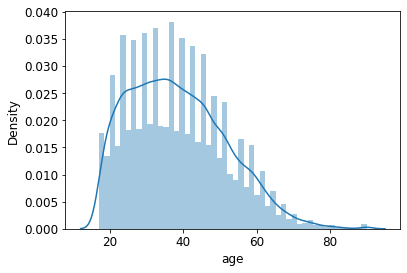

In [44]:
sns.distplot(salary_train_data['age'])

<AxesSubplot:xlabel='hoursperweek', ylabel='Density'>

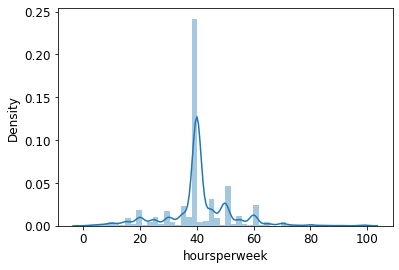

In [45]:
sns.distplot(salary_train_data['hoursperweek'])

<AxesSubplot:xlabel='age', ylabel='Density'>

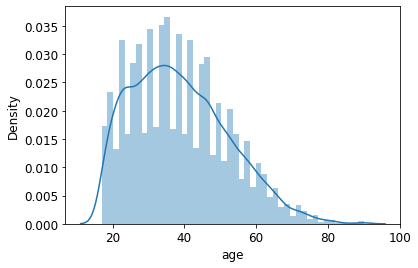

In [46]:
sns.distplot(salary_test_data['age'])

<AxesSubplot:xlabel='hoursperweek', ylabel='Density'>

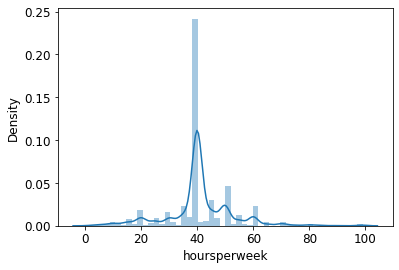

In [47]:
sns.distplot(salary_test_data['hoursperweek'])

In [48]:
categorical_features=[feature for feature in salary_train_data.columns if salary_train_data[feature].dtype=='O']

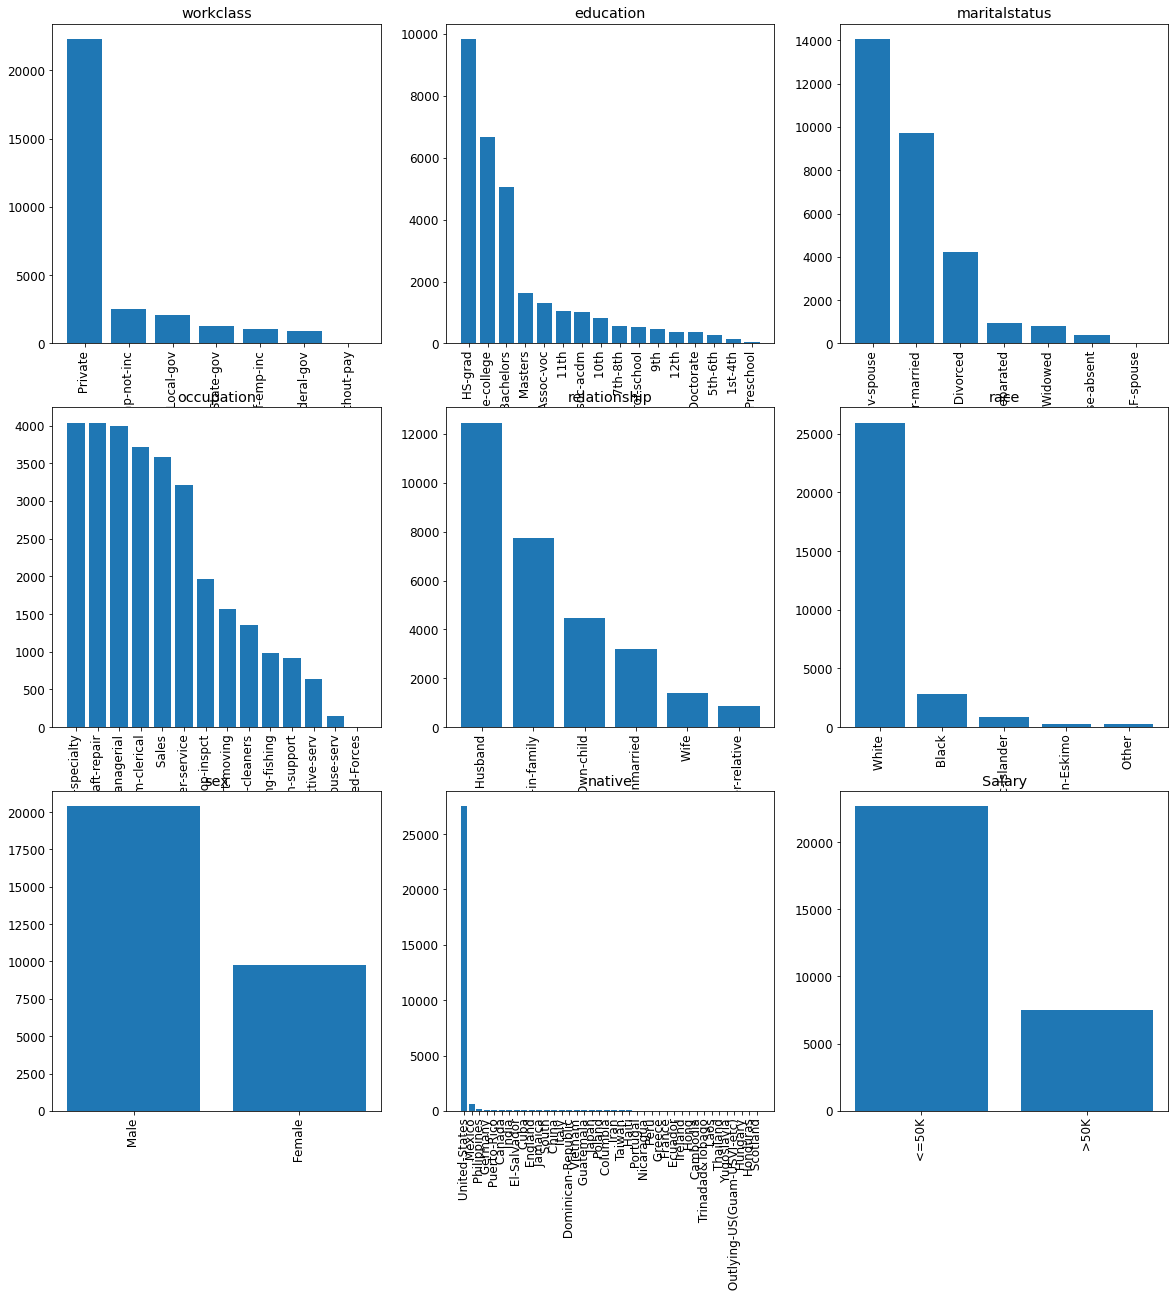

In [51]:
fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 20))

counter = 0
for cat_column in categorical_features:
    value_counts = salary_train_data[cat_column].value_counts()
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    axs[trace_x, trace_y].set_title(cat_column)
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    counter += 1
plt.show()

In [52]:
categorical_features=[feature for feature in salary_test_data.columns if salary_test_data[feature].dtype=='O']

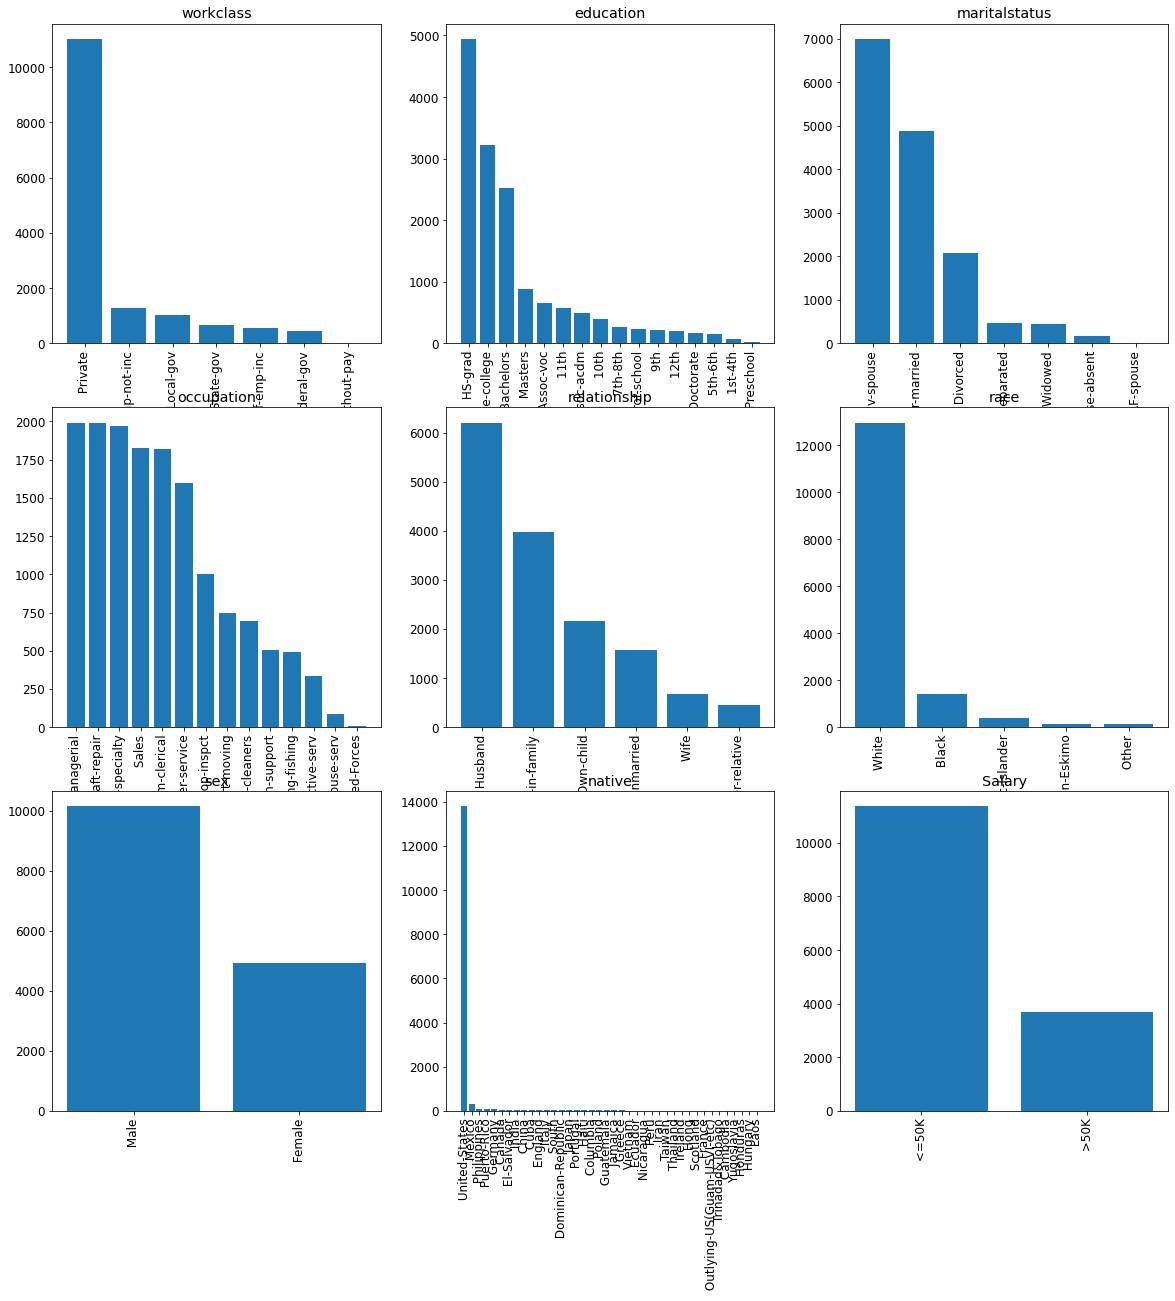

In [53]:
fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 20))

counter = 0
for cat_column in categorical_features:
    value_counts = salary_test_data[cat_column].value_counts()
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    axs[trace_x, trace_y].set_title(cat_column)
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    counter += 1
plt.show()

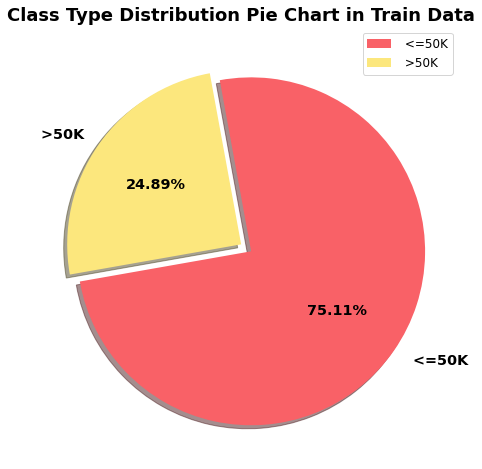

In [59]:
plt.figure(figsize = (12,8))
plt.pie(salary_train_data['Salary'].value_counts(),
       labels=salary_train_data.Salary.unique(),
       explode = [0.07,0.0],
       autopct= '%.2f%%',
        colors = ["#F96167", "#FCE77D"],
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Class Type Distribution Pie Chart in Train Data", fontsize = 18, fontweight = 'bold')
plt.show()

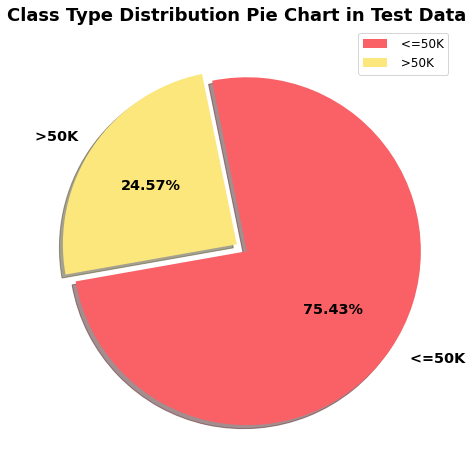

In [58]:
plt.figure(figsize = (12,8))
plt.pie(salary_test_data['Salary'].value_counts(),
       labels=salary_test_data.Salary.unique(),
       explode = [0.07,0.0],
       autopct= '%.2f%%',
        colors = ["#F96167", "#FCE77D"],
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Class Type Distribution Pie Chart in Test Data", fontsize = 18, fontweight = 'bold')
plt.show()

In [8]:
salary_train_data['Salary'].value_counts()

 <=50K    22653
 >50K      7508
Name: Salary, dtype: int64

In [9]:
salary_test_data['Salary'].value_counts()

 <=50K    11360
 >50K      3700
Name: Salary, dtype: int64

## Preprocessing

### Label Encoding Technique

In [10]:
df_train= salary_train_data.copy()
label_encoder = LabelEncoder()
df_train["education"]=label_encoder.fit_transform(df_train["education"])
df_train["workclass"]=label_encoder.fit_transform(df_train["workclass"])
df_train["maritalstatus"]=label_encoder.fit_transform(df_train["maritalstatus"])
df_train["sex"]=label_encoder.fit_transform(df_train["sex"])
df_train["race"]=label_encoder.fit_transform(df_train["race"])
df_train["occupation"]=label_encoder.fit_transform(df_train["occupation"])
df_train["relationship"]=label_encoder.fit_transform(df_train["relationship"])
df_train["native"]=label_encoder.fit_transform(df_train["native"])
df_train.head(10)

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,hoursperweek,native,Salary
0,39,5,9,4,0,1,4,1,40,37,<=50K
1,50,4,9,2,3,0,4,1,13,37,<=50K
2,38,2,11,0,5,1,4,1,40,37,<=50K
3,53,2,1,2,5,0,2,1,40,37,<=50K
4,28,2,9,2,9,5,2,0,40,4,<=50K
5,37,2,12,2,3,5,4,0,40,37,<=50K
6,49,2,6,3,7,1,2,0,16,21,<=50K
7,52,4,11,2,3,0,4,1,45,37,>50K
8,31,2,12,4,9,1,4,0,50,37,>50K
9,42,2,9,2,3,0,4,1,40,37,>50K


In [11]:
df_test= salary_test_data.copy()
label_encoder = LabelEncoder()
df_test["education"]=label_encoder.fit_transform(df_test["education"])
df_test["workclass"]=label_encoder.fit_transform(df_test["workclass"])
df_test["maritalstatus"]=label_encoder.fit_transform(df_test["maritalstatus"])
df_test["sex"]=label_encoder.fit_transform(df_test["sex"])
df_test["race"]=label_encoder.fit_transform(df_test["race"])
df_test["occupation"]=label_encoder.fit_transform(df_test["occupation"])
df_test["relationship"]=label_encoder.fit_transform(df_test["relationship"])
df_test["native"]=label_encoder.fit_transform(df_test["native"])
df_test.head(10)

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,hoursperweek,native,Salary
0,25,2,1,4,6,3,2,1,40,37,<=50K
1,38,2,11,2,4,0,4,1,50,37,<=50K
2,28,1,7,2,10,0,4,1,40,37,>50K
3,44,2,15,2,6,0,2,1,40,37,>50K
4,34,2,0,4,7,1,4,1,30,37,<=50K
5,63,4,14,2,9,0,4,1,32,37,>50K
6,24,2,15,4,7,4,4,0,40,37,<=50K
7,55,2,5,2,2,0,4,1,10,37,<=50K
8,65,2,11,2,6,0,4,1,40,37,>50K
9,36,0,9,2,0,0,4,1,40,37,<=50K


### Converting string value into binary classes such as if ">50K" than classify it as '1' else 'O'

In [12]:
df_train['Salary'] = np.where(df_train['Salary'].str.contains(" >50K"), 1, 0)
df_train.head()

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,hoursperweek,native,Salary
0,39,5,9,4,0,1,4,1,40,37,0
1,50,4,9,2,3,0,4,1,13,37,0
2,38,2,11,0,5,1,4,1,40,37,0
3,53,2,1,2,5,0,2,1,40,37,0
4,28,2,9,2,9,5,2,0,40,4,0


In [13]:
df_test['Salary'] = np.where(df_test['Salary'].str.contains(" >50K"), 1, 0)
df_test.head()

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,hoursperweek,native,Salary
0,25,2,1,4,6,3,2,1,40,37,0
1,38,2,11,2,4,0,4,1,50,37,0
2,28,1,7,2,10,0,4,1,40,37,1
3,44,2,15,2,6,0,2,1,40,37,1
4,34,2,0,4,7,1,4,1,30,37,0


### Applying Standard Scaler

In [14]:
scaler = StandardScaler()
df_train[['age','hoursperweek']] = scaler.fit_transform(df_train[['age','hoursperweek']])
df_train.head()

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,hoursperweek,native,Salary
0,0.042779,5,9,4,0,1,4,1,-0.077735,37,0
1,0.880261,4,9,2,3,0,4,1,-2.331495,37,0
2,-0.033356,2,11,0,5,1,4,1,-0.077735,37,0
3,1.108665,2,1,2,5,0,2,1,-0.077735,37,0
4,-0.794703,2,9,2,9,5,2,0,-0.077735,4,0


In [15]:
scaler = StandardScaler()
df_test[['age','hoursperweek']] = scaler.fit_transform(df_test[['age','hoursperweek']])
df_test.head()

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,hoursperweek,native,Salary
0,-1.029005,2,1,4,6,3,2,1,-0.078889,37,0
1,-0.057423,2,11,2,4,0,4,1,0.750131,37,0
2,-0.804794,1,7,2,10,0,4,1,-0.078889,37,1
3,0.391000,2,15,2,6,0,2,1,-0.078889,37,1
4,-0.356371,2,0,4,7,1,4,1,-0.907909,37,0


In [16]:
x_train = df_train.drop('Salary', axis = 1)
y_train = df_train['Salary']

In [17]:
x_test = df_test.drop('Salary', axis = 1)
y_test = df_test['Salary']

In [18]:
print('Training Data', Counter(y_train), 'Testing Data', Counter(y_test))

Training Data Counter({0: 22653, 1: 7508}) Testing Data Counter({0: 11360, 1: 3700})


In [19]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (30161, 10)
Shape of X_test:  (15060, 10)
Shape of y_train:  (30161,)
Shape of y_test (15060,)


# Model Bulding using default Hyper Parametetrs on Imbalanced Data

In [20]:
clf = SVC()

In [21]:
clf.fit(x_train, y_train)

SVC()

In [22]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [23]:
print_score(clf, x_train, y_train, x_test, y_test, train=True)
print_score(clf, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 75.11%
_______________________________________________
CLASSIFICATION REPORT:
                      0       1  accuracy     macro avg  weighted avg
precision      0.751069     0.0  0.751069      0.375535      0.564105
recall         1.000000     0.0  0.751069      0.500000      0.751069
f1-score       0.857841     0.0  0.751069      0.428920      0.644298
support    22653.000000  7508.0  0.751069  30161.000000  30161.000000
_______________________________________________
Confusion Matrix: 
 [[22653     0]
 [ 7508     0]]

Test Result:
Accuracy Score: 75.43%
_______________________________________________
CLASSIFICATION REPORT:
                      0       1  accuracy     macro avg  weighted avg
precision      0.754316     0.0  0.754316      0.377158      0.568993
recall         1.000000     0.0  0.754316      0.500000      0.754316
f1-score       0.859955     0.0  0.754316      0.429977      0.648678
support    11360.000000  3700.0  0.754316  15060.000000

###### **As the data is imbalanced, our model prediction is biased

## Hyperparameter Tuning with GridSearchCV

### Choose the best kernel and optimal C parameter based on Cross Validation of the training data

In [24]:
tuned_parameters = [{'C':[1, 10, 100], 'kernel':['linear']},
                    {'C':[1, 10, 100], 'kernel':['rbf'], 'gamma':[0.1, 0.01, 0.001]},
                   ]

In [25]:
print("# Tuning hyper-parameters for Accuracy")
print()
clf = GridSearchCV(svm.SVC(), tuned_parameters, scoring='accuracy', n_jobs=-1)
clf.fit(x_train, y_train)
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_["mean_test_score"]
stds = clf.cv_results_["std_test_score"]
for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()
print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, clf.predict(x_test)
print(classification_report(y_true, y_pred, target_names = ["<=50K", ">50K"]))
print()

# Tuning hyper-parameters for Accuracy

Best parameters set found on development set:

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

Grid scores on development set:

0.751 (+/-0.000) for {'C': 1, 'kernel': 'linear'}
0.751 (+/-0.000) for {'C': 10, 'kernel': 'linear'}
0.759 (+/-0.010) for {'C': 100, 'kernel': 'linear'}
0.825 (+/-0.008) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.797 (+/-0.007) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.751 (+/-0.000) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.824 (+/-0.007) for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.809 (+/-0.012) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.752 (+/-0.001) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.815 (+/-0.006) for {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
0.816 (+/-0.010) for {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0.795 (+/-0.007) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full

In [26]:
y_pred = clf.predict(x_test)

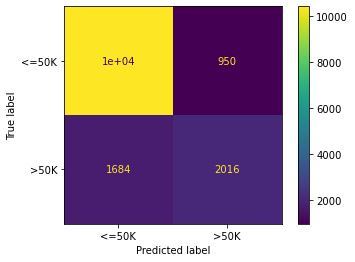

In [27]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=["<=50K", ">50K"]).plot()
plt.show()

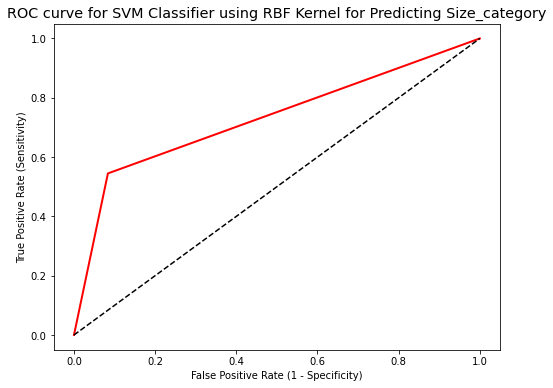

ROC AUC : 0.7306


In [30]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, linewidth=2, color='red')
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for SVM Classifier using RBF Kernel for Predicting Size_category')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

ROC_AUC = roc_auc_score(y_test, y_pred)
print('ROC AUC : {:.4f}'.format(ROC_AUC))